In [1]:
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import skimage.io as sk

In [5]:
def similarity_matrix(X, sigma):
    n = len(X)
    sim_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            if i == j:
                sim_matrix[i, j] = 1   #Similarity between 2 same rows is 1
            else:
                dist = X[i]-X[j]
                k = (-1 / (2 * (sigma**2))) * (dist**2)
                sim_matrix[i, j] = sim_matrix[j, i] = math.exp(k)
    return sim_matrix
                
            
def Laplacian_matrix(A):
    n = len(A)
    D = np.zeros((n, n))  #D is a diagonal matrix with D[i, i]= ´∑j A[i, j]
    M = A.sum(axis=1)
    print(M.shape)
    for i in range(n):
        D[i, i] = M[i]
    return D - A
            

def eigen(L):
    return np.linalg.eigh(L)

def spectralClustering(X, K, sigma):
    A  = similarity_matrix(X, sigma)
    print(A[0])
    L  =  Laplacian_matrix(A)
  
    print(L[0])
    eigenValues, eigenVectors = eigen(L)
    idx = eigenValues.argsort()[0:K]  
    eigenValues = eigenValues[idx]

    V = eigenVectors[:,idx]

    spectral = KMeans(n_clusters=K).fit(V)
    labels = spectral.labels_
    clusters, cluster_centers = clusters_formation(labels, X, K)
    return clusters, cluster_centers, labels

def clusters_formation(labels, data, m):
    clusters = []  #Initilaizing the Clusters 
    cluster_centers = [] #Initilaizing the Clusters centers
    for i in range(m):   #Initilaizing each Cluster Center 
        clusters.append([])
        cluster_centers.append(0)
    n = len(data)
    for i in range(n):
        clusters[labels[i]].append(data[i])
        cluster_centers[labels[i]] = cluster_centers[labels[i]]+data[i]
    for i in range(m):
        cluster_centers[i] = cluster_centers[i]/len(clusters[i])
    return clusters, cluster_centers    

def loss(clusters, centers):
    n = len(centers)
    loss = 0
    
    for i in range(n): #for each cluster
        cluster_center = centers[i]
        cluster = clusters[i]
        for j in cluster:
            k = np.linalg.norm(cluster_center-j)
            loss += k**2
    return loss

7500


C:\Users\miriy\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


[1.         1.         0.60653066 ... 0.         0.         0.        ]
(7500,)
[25.2496313  -1.         -0.60653066 ...  0.          0.
  0.        ]


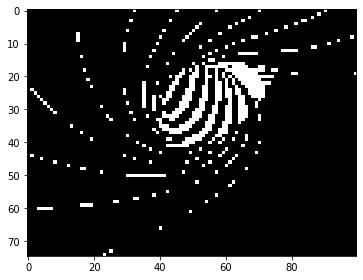

In [16]:
K = 2

data = plt.imread(r"C:\Users\miriy\Downloads\bw.jpg")  #Converting a grayscale image into a list of pixel values

data = data.flatten()
print(len(data))
sigma = 0.1
clusters, cluster_centers, labels = spectralClustering(data, K, i)
image_labels = np.array(labels).astype(np.float)
image_labels = np.reshape(image_labels, (75, 100))
Loss_Spectral = loss(clusters, cluster_centers)

sk.imshow(image_labels)
    # sk.imsave("Spectral.jpg", image_labels)
    # print('End')
data = data.reshape(-1,1)

C:\Users\miriy\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


Loss_kmeans 8552679.704498377
Loss_Spectral 83306604.07226256


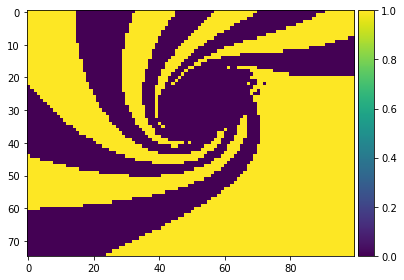

In [7]:
kmeans = KMeans(n_clusters=2).fit(data)
clusters_kmeans = clusters_formation(kmeans.labels_, data, K)[0]


Loss_kmeans = loss(clusters_kmeans, kmeans.cluster_centers_)
image_labels = np.reshape(kmeans.labels_, (75, 100))

sk.imshow(image_labels)
print('Loss_kmeans', Loss_kmeans)
#sk.imsave("Kmeans.jpg", image_labels)
print('Loss_Spectral', Loss_Spectral)